In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from scipy import stats
from scipy.stats import norm
from scipy.stats import uniform
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats import anova as sms_anova


from sklearn.preprocessing import MinMaxScaler
## MinMaxScaler.fit_transform is for Normalizing the data

from sklearn.preprocessing import StandardScaler
## StandardScaler.fit_transform to standarize data

from statsmodels.graphics import tsaplots ## For making plots of the auto-correlation function
from statsmodels.tsa.ar_model import AutoReg ##For estimating AR models
from statsmodels.graphics.tsaplots import plot_pacf ## For making plots of the partial auto-correlation function

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from datetime import datetime, timedelta
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
# Function to plot the series
def plot_series(series):
    plt.figure(figsize=(20,10))
    plt.plot(series, color='navy')
    plt.axhline(series.mean(), linestyle='--', color='k', alpha=0.3)
    plt.ylabel("Demand", fontsize=16)

    for year in range(2016, 2021):
        for month in range(1, 13):
            plt.axvline(datetime(year,month,1), linestyle='--', color='k', alpha=0.5)

In [3]:
# Importing the demand data for Ontario Region 
demand_df = pd.read_excel("../Research Method/merged_demand_1620.xlsx")
demand_df

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
0,2016-01-01,1,13417,479,1318,783,965,4789,867,57,2603,377,1212,13451,33
1,2016-01-01,2,12968,473,1281,715,975,4597,829,59,2491,377,1183,12979,11
2,2016-01-01,3,12395,464,1158,693,945,4441,796,65,2392,365,1135,12454,59
3,2016-01-01,4,12228,447,1170,681,923,4332,776,48,2349,352,1118,12195,-33
4,2016-01-01,5,12116,432,1182,676,926,4272,774,63,2307,349,1108,12089,-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43843,2020-12-31,20,16783,598,1287,1151,1112,5948,1249,158,3128,498,1770,16900,116
43844,2020-12-31,21,16154,597,1296,1102,1062,5741,1182,153,3028,475,1735,16371,217
43845,2020-12-31,22,15744,581,1290,1055,1011,5527,1124,153,2908,467,1684,15801,58
43846,2020-12-31,23,15092,571,1289,1002,962,5301,1070,156,2773,443,1600,15167,75


In [4]:
# Adding the "HOUR" column to the "Date" column and changing it to datetime format
demand_df["Date"] +=  pd.to_timedelta(demand_df.Hour, unit='h')
demand_df.head(30)

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
0,2016-01-01 01:00:00,1,13417,479,1318,783,965,4789,867,57,2603,377,1212,13451,33
1,2016-01-01 02:00:00,2,12968,473,1281,715,975,4597,829,59,2491,377,1183,12979,11
2,2016-01-01 03:00:00,3,12395,464,1158,693,945,4441,796,65,2392,365,1135,12454,59
3,2016-01-01 04:00:00,4,12228,447,1170,681,923,4332,776,48,2349,352,1118,12195,-33
4,2016-01-01 05:00:00,5,12116,432,1182,676,926,4272,774,63,2307,349,1108,12089,-28
5,2016-01-01 06:00:00,6,12257,448,1186,698,941,4294,786,57,2339,361,1114,12222,-35
6,2016-01-01 07:00:00,7,12528,462,1190,747,955,4373,811,52,2405,366,1145,12506,-22
7,2016-01-01 08:00:00,8,12820,507,1143,761,987,4475,837,66,2463,386,1176,12801,-18
8,2016-01-01 09:00:00,9,12986,515,1155,755,1042,4548,873,70,2496,402,1187,13042,57
9,2016-01-01 10:00:00,10,13569,529,1219,807,1061,4754,924,65,2582,419,1203,13562,-6


In [5]:
# Setting the date as the index column
demand_df.set_index("Date", inplace = True)

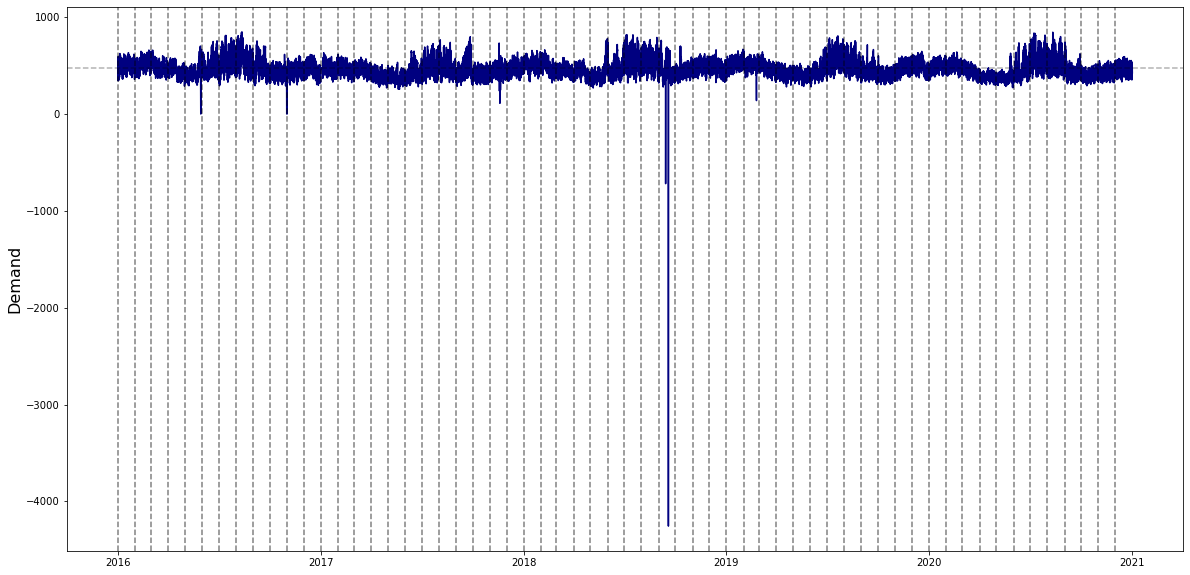

In [6]:
# Plotting the deries
plot_series(demand_df["Niagara"])

In [7]:
# Key statistics of the Niagara and Toronto region 
demand_df.loc[:, ["Toronto", "Niagara"]].describe()

,Toronto,Niagara
count,43848.000000,43848.000000
mean,5709.157453,472.270525
std,1026.431346,95.900662
min,0.000000,-4255.000000
25%,4934.000000,408.000000
50%,5707.000000,463.000000
75%,6343.000000,525.000000
max,9769.000000,847.000000


In [8]:
#Looking for missing values
demand_df.isnull().sum().sum()

0

## It is observed that there some negative values which could be bad data since the demand for electricity cannot be negative. We replace the negative values with the demand in the previous hour

In [9]:
# Replacing all negative values with zeros
demand_df["Niagara"][demand_df["Niagara"] < 0] = 0
# Replacing all zeros with the value in the previous row
demand_df["Niagara"].replace(to_replace=0, method='ffill', inplace = True)

## Plotting the series again to confirm that the erroneous entries have been fixed

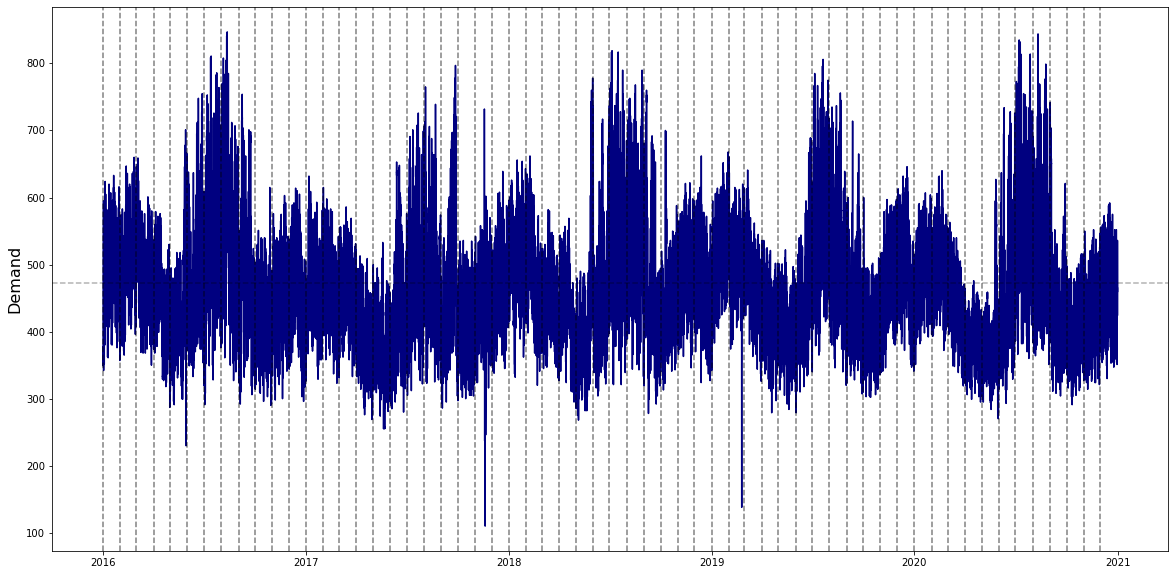

In [10]:
# Plotting the series
plot_series(demand_df["Niagara"])

In [11]:
# Resampling the data from hourly to weekly using the mean
weekly_demand_df = demand_df.resample("W").mean().round(2)
weekly_demand_df

,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
Date,,,,,,,,,,,,,,
2016-01-03,12.34,14726.76,496.54,1322.28,881.21,1093.35,5222.96,979.55,68.63,2844.17,433.83,1366.63,14709.18,-17.61
2016-01-10,12.50,16624.64,517.18,1367.18,993.01,1190.87,6039.77,1055.76,75.32,3290.04,489.87,1580.66,16599.66,-25.00
2016-01-17,12.50,17141.18,582.51,1427.20,1031.46,1239.89,6200.93,1111.35,95.66,3377.35,499.07,1574.57,17139.93,-1.17
2016-01-24,12.50,17347.23,550.18,1410.60,1080.23,1229.25,6261.16,1147.45,99.38,3412.12,525.38,1629.85,17345.54,-1.70
2016-01-31,12.50,16300.70,508.26,1394.64,1013.82,1109.87,5969.30,1017.74,82.68,3221.72,482.98,1500.35,16301.29,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-06,12.50,15633.42,565.76,1227.70,1020.70,982.40,5640.32,1051.01,83.36,3053.43,464.42,1665.74,15754.93,121.53
2020-12-13,12.50,15900.15,581.35,1263.80,1049.41,1000.91,5687.89,1057.27,133.59,3076.08,463.57,1710.11,16024.06,123.89
2020-12-20,12.50,16755.65,607.86,1331.36,1142.47,1098.99,5920.78,1160.43,155.25,3214.30,486.97,1762.89,16881.39,125.72


In [12]:
#Checking for NaN's after resampling data
weekly_demand_df.isnull().sum().sum()

0

In [13]:
# Creating a target variable
y_hol_weekly = weekly_demand_df["Niagara"]

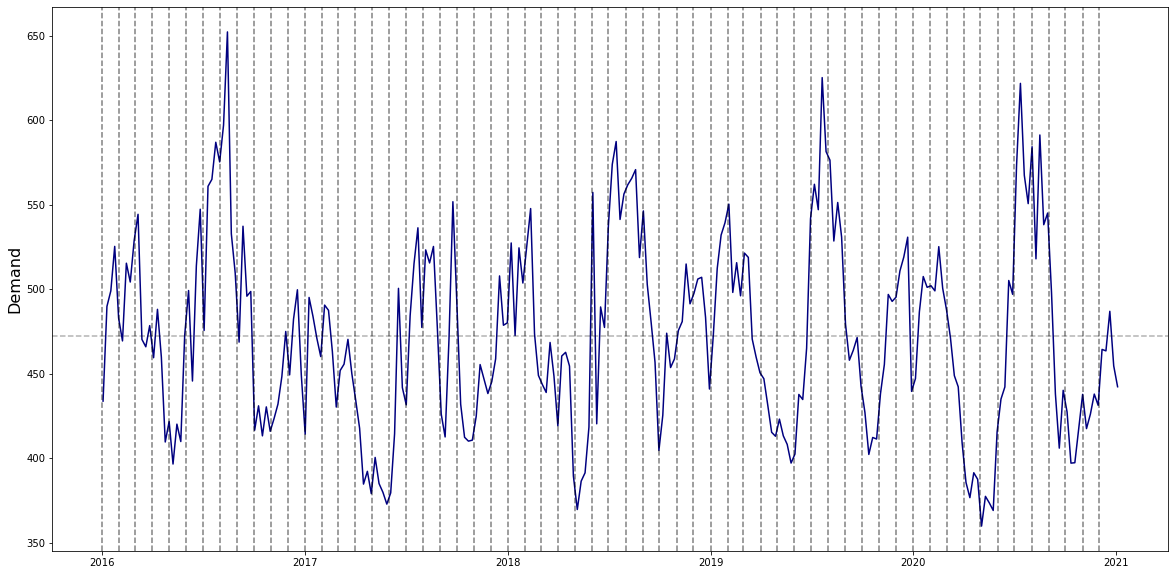

In [14]:
plot_series(y_hol_weekly)

## USING AUGMENTED DICKEY FULLER TEST TO CHECK FOR STATIONARITY

In [15]:
## ADF tests for Niagara 
adf_hol_weekly = adfuller(y_hol_weekly, autolag='AIC')
print(f'ADF Statistic hol_weekly: {adf_hol_weekly[0]}')
print(f'p-value hol_weekly: {adf_hol_weekly[1]}')

ADF Statistic hol_weekly: -7.265097009710906
p-value hol_weekly: 1.6428870178093408e-10


## The non-seasonal data is stationary

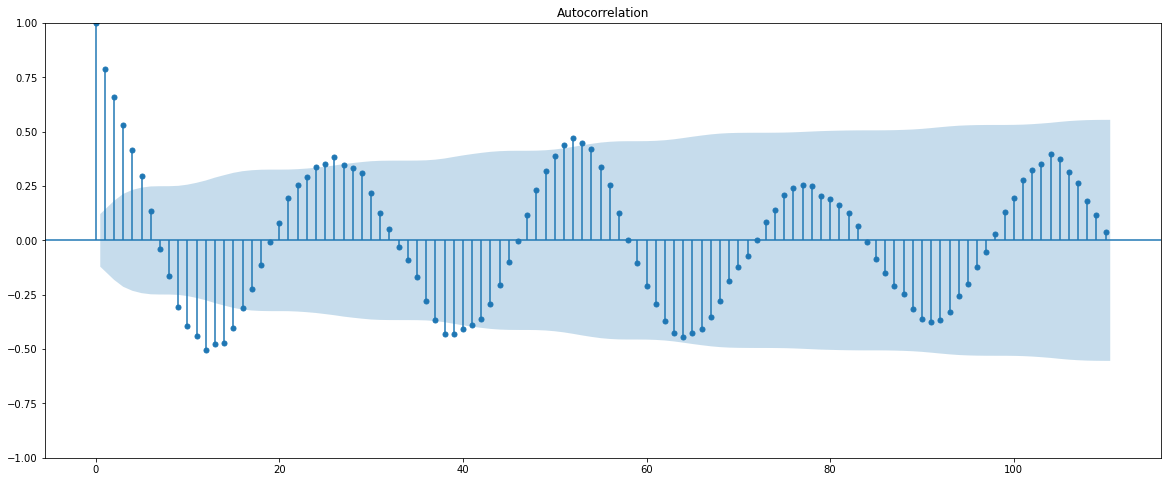

In [16]:
# ACF plot for Niagara demand
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_acf(y_hol_weekly, lags = 110, ax=ax);

## We clearly see a cyclical trend every 12 weeks (approx). Hence, we will use a Seasonal ARIMA model

/Users/naziheffendi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


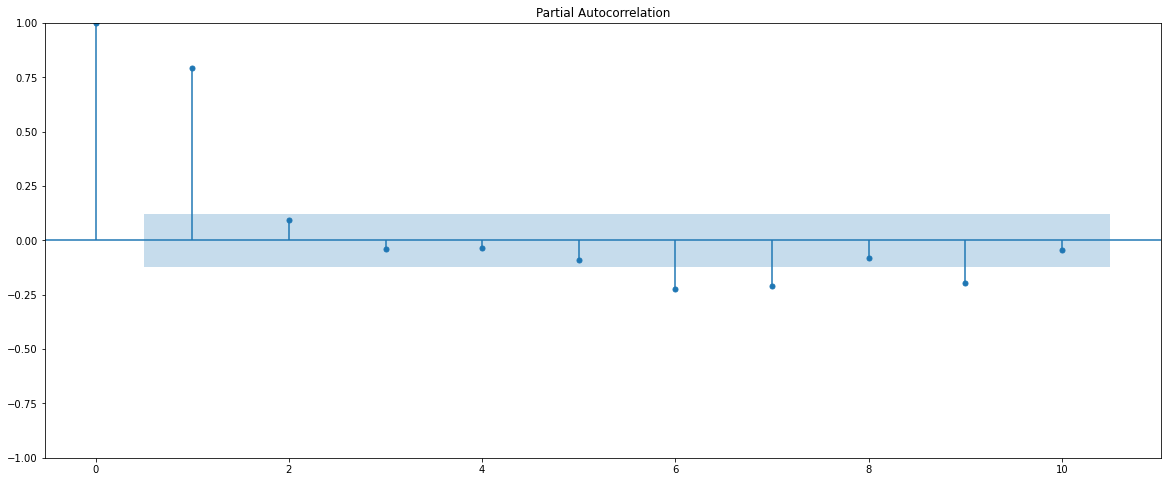

In [17]:
# Creating a PACF plot for the Niagara data
fig, ax = plt.subplots(figsize=(20,8))
sm.graphics.tsa.plot_pacf(y_hol_weekly, lags = 10
                          , ax=ax);

In [18]:
weekly_demand_df["Niagara_lagged"] = y_hol_weekly.shift(1)

In [19]:
weekly_demand_df["Month"] = weekly_demand_df.index.month

In [20]:
weekly_demand_df["Month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [21]:
weekly_demand_df.rename(columns={"Month" : "Season"}, inplace=True, errors='raise')

In [22]:
weekly_demand_df["Season"].replace([1,2,12], "Winter", inplace = True)
weekly_demand_df["Season"].replace([3,4,5], "Spring", inplace = True)
weekly_demand_df["Season"].replace([6,7,8], "Summer", inplace = True)
weekly_demand_df["Season"].replace([9,10,11], "Fall", inplace = True)

In [23]:
weekly_demand_df["Season"].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [24]:
weekly_demand_df.dropna(inplace = True)
weekly_demand_df_2 = pd.get_dummies(weekly_demand_df, drop_first = True)
weekly_demand_df_2

,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Niagara_lagged,Season_Spring,Season_Summer,Season_Winter
Date,,,,,,,,,,,,,,,,,,
2016-01-10,12.50,16624.64,517.18,1367.18,993.01,1190.87,6039.77,1055.76,75.32,3290.04,489.87,1580.66,16599.66,-25.00,433.83,0,0,1
2016-01-17,12.50,17141.18,582.51,1427.20,1031.46,1239.89,6200.93,1111.35,95.66,3377.35,499.07,1574.57,17139.93,-1.17,489.87,0,0,1
2016-01-24,12.50,17347.23,550.18,1410.60,1080.23,1229.25,6261.16,1147.45,99.38,3412.12,525.38,1629.85,17345.54,-1.70,499.07,0,0,1
2016-01-31,12.50,16300.70,508.26,1394.64,1013.82,1109.87,5969.30,1017.74,82.68,3221.72,482.98,1500.35,16301.29,0.60,525.38,0,0,1
2016-02-07,12.50,15817.75,535.10,1402.75,920.62,1066.52,5790.42,958.99,86.81,3114.29,469.45,1483.17,15828.11,10.38,482.98,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-06,12.50,15633.42,565.76,1227.70,1020.70,982.40,5640.32,1051.01,83.36,3053.43,464.42,1665.74,15754.93,121.53,431.36,0,0,1
2020-12-13,12.50,15900.15,581.35,1263.80,1049.41,1000.91,5687.89,1057.27,133.59,3076.08,463.57,1710.11,16024.06,123.89,464.42,0,0,1
2020-12-20,12.50,16755.65,607.86,1331.36,1142.47,1098.99,5920.78,1160.43,155.25,3214.30,486.97,1762.89,16881.39,125.72,463.57,0,0,1


In [25]:
import statsmodels.api as sm
y = weekly_demand_df_2["Niagara"]
X = weekly_demand_df_2[["Niagara_lagged", "Season_Spring", "Season_Summer", "Season_Winter"]]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Niagara   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     140.3
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           2.74e-63
Time:                        22:12:45   Log-Likelihood:                -1269.4
No. Observations:                 261   AIC:                             2549.
Df Residuals:                     256   BIC:                             2567.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            167.6035     19.568      8.565      0.000     129.069     206.138
Niagara_lagged     0.6224      0.042     14.742      0.000       0.539       0.705
Season_Spring     -8.8135      5.595     -1.575      0.116     -19.831       2.204
Season_Summer     34.7483      6.120      5.678      0.000      22.696      46.801
Season_Winter     18.0578      5.732      3.150      0.002       6.770      29.346
==============================================================================
Omnibus:                        6.858   Durbin-Watson:                   2.178
Prob(Omnibus):                  0.032   Jarque-Bera (JB):               11.090
Skew:                          -0.029   Prob(JB):                      0.00391
Kurtosis:                       4.008   Cond. No.                     4.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
resids = model.resid

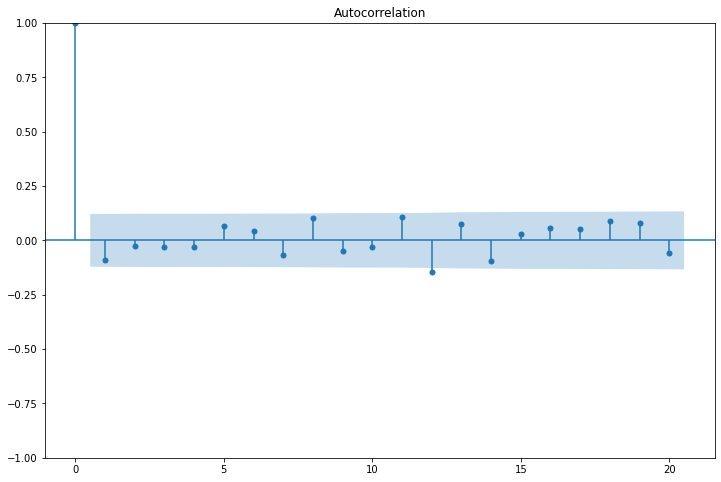

In [27]:
# ACF of the residuals of the first model
fig, ax = plt.subplots(figsize=(12,8))
sm.graphics.tsa.plot_acf(resids, lags = 20, ax=ax);

In [28]:
weekly_demand_df_2["Predictions"] = model.predict()

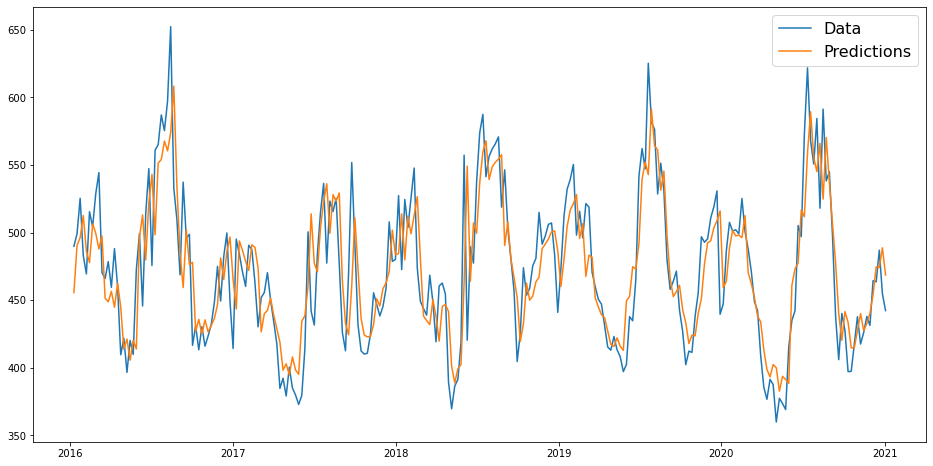

In [29]:
# Plotting the predictions against the real data
plt.figure(figsize=(16,8))

plt.plot(weekly_demand_df_2["Niagara"])
plt.plot(weekly_demand_df_2["Predictions"])

plt.legend(('Data', 'Predictions'), fontsize=16)

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(weekly_demand_df_2["Niagara"], weekly_demand_df_2["Predictions"], squared = False)

31.32683027642209

In [31]:
summer_demand = weekly_demand_df.loc[weekly_demand_df["Season"].isin(["Summer"]), "Niagara"]
winter_demand = weekly_demand_df.loc[weekly_demand_df["Season"].isin(["Winter"]), "Niagara"]
fall_demand = weekly_demand_df.loc[weekly_demand_df["Season"].isin(["Fall"]), "Niagara"]
spring_demand = weekly_demand_df.loc[weekly_demand_df["Season"].isin(["Spring"]), "Niagara"]

In [32]:
# Create DataFrame
season_demand_df = pd.DataFrame(data = [summer_demand, winter_demand, fall_demand, spring_demand],
                                index = ["Summer", "Winter", "Fall", "Spring"]).transpose()
  
# Print the output.
season_demand_df

,Summer,Winter,Fall,Spring
Date,,,,
2016-01-10,NaN,489.87,NaN,NaN
2016-01-17,NaN,499.07,NaN,NaN
2016-01-24,NaN,525.38,NaN,NaN
2016-01-31,NaN,482.98,NaN,NaN
2016-02-07,NaN,469.45,NaN,NaN
...,...,...,...,...
2020-12-06,NaN,464.42,NaN,NaN
2020-12-13,NaN,463.57,NaN,NaN
2020-12-20,NaN,486.97,NaN,NaN


In [33]:
season_demand_df.describe()

,Summer,Winter,Fall,Spring
count,65.000000,65.000000,65.000000,66.000000
mean,523.037692,489.487846,450.210923,428.665303
std,58.236924,30.301837,37.095098,41.079368
min,379.560000,414.290000,397.150000,359.900000
25%,484.390000,469.450000,423.580000,391.667500
50%,532.870000,495.170000,438.330000,420.985000
75%,565.050000,507.910000,475.050000,459.750000
max,652.270000,550.360000,551.810000,544.360000


In [34]:
summer_demand_tor = weekly_demand_df.loc[weekly_demand_df["Season"].isin(["Summer"]), "Toronto"]
winter_demand_tor = weekly_demand_df.loc[weekly_demand_df["Season"].isin(["Winter"]), "Toronto"]
fall_demand_tor = weekly_demand_df.loc[weekly_demand_df["Season"].isin(["Fall"]), "Toronto"]
spring_demand_tor = weekly_demand_df.loc[weekly_demand_df["Season"].isin(["Spring"]), "Toronto"]

In [35]:
# Create DataFrame
season_demand_df_tor = pd.DataFrame(data = [summer_demand_tor, winter_demand_tor, fall_demand_tor, spring_demand_tor],
                                index = ["Summer", "Winter", "Fall", "Spring"]).transpose()
  
# Print the output.
season_demand_df_tor

,Summer,Winter,Fall,Spring
Date,,,,
2016-01-10,NaN,6039.77,NaN,NaN
2016-01-17,NaN,6200.93,NaN,NaN
2016-01-24,NaN,6261.16,NaN,NaN
2016-01-31,NaN,5969.30,NaN,NaN
2016-02-07,NaN,5790.42,NaN,NaN
...,...,...,...,...
2020-12-06,NaN,5640.32,NaN,NaN
2020-12-13,NaN,5687.89,NaN,NaN
2020-12-20,NaN,5920.78,NaN,NaN


In [37]:
season_demand_df_tor.describe()

,Summer,Winter,Fall,Spring
count,65.000000,65.000000,65.000000,66.000000
mean,6179.621077,5851.409692,5455.332923,5357.283636
std,531.235694,272.067999,392.882186,341.082308
min,5097.060000,5119.340000,4516.510000,4683.030000
25%,5882.960000,5706.430000,5173.310000,5117.480000
50%,6185.410000,5912.510000,5367.200000,5371.265000
75%,6618.740000,5993.710000,5674.840000,5594.347500
max,7378.900000,6420.140000,6652.070000,6133.830000
